In [7]:
import pandas as pd
data = pd.read_csv("data.csv")
labels = data['Heart Disease']
data = data.drop('Heart Disease', axis=1)
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


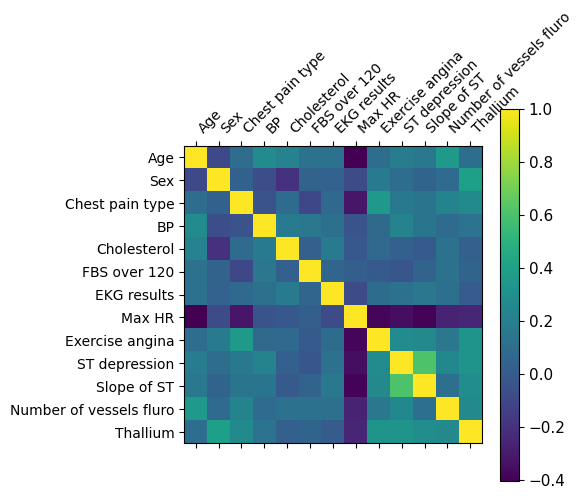

In [16]:
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.matshow(corr_matrix)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns,rotation=45, ha='left')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.show()

In [22]:
# split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=30)

In [23]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
std_scl.fit(X_train)

X_train = std_scl.transform(X_train)
X_test = std_scl.transform(X_test)

In [153]:
from sklearn.ensemble import RandomForestClassifier
rdm_forest = RandomForestClassifier(max_depth=4)

rdm_forest.fit(X_train, y_train)
rdm_forest.score(X_test, y_test)

0.9259259259259259

In [91]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8703703703703703

In [87]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.8703703703703703